<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_03_Arboles/03A_sin_resolver_%7C_Repaso_I_sobre_%C3%81rboles_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 REPASO I: Árboles de Decisión
Repaso sobre cómo utilizar árboles de decisión.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1jRg7Dk2y_2_fxnC_Jpj5aWcqgW9t1KAd7izdmWzv9Sk/edit?usp=sharing)
*   [Enlace a este notebook ya resuelto](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_03_Arboles/03A_%7C_Repaso_I_sobre_%C3%81rboles_Decisi%C3%B3n.ipynb)




## 0101 Qué es un árbol de decisión?
Un tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones recursivas a partir de distintos niveles de las variables disponibles.

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset del Titanic
Recordais el dataset del Titanic?

Vamos a hacer un árbol de decisión que prediga si alguien fallece o no. Este mismo ejemplo lo resolvisteis en el [notebook 1A](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_01_Arboles/01_A_%C3%81rboles_Decisi%C3%B3n_Clasificaci%C3%B3n_Resuelto.ipynb#scrollTo=V66-xgckYMQs).

Para ello utilizaremos un dataset previamente transformado, ya listo para entrenar un árbol. Puedes encontrarlo en mi github. Este es el link al archivo raw: https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Titanic_Limpio.csv.

Importa los datos en un dataframe llamado **dataframe df_titanic**.

In [2]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Titanic_Limpio.csv'

# Importa csv
df_titanic = pd.read_csv(url)

# Visualización primeras filas
df_titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,22.0,0,0,1
1,1,1,0,1,0,71.2833,38.0,1,0,0
2,1,3,0,0,0,7.9250,26.0,0,0,1
3,1,1,0,1,0,53.1000,35.0,0,0,1
4,0,3,1,0,0,8.0500,35.0,0,0,1


# 02 EDA
Realizaremos un pequeño análisis exploratorio visual para familiarizarnos con el dataset. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Age         889 non-null    float64
 7   Embarked_C  889 non-null    int64  
 8   Embarked_Q  889 non-null    int64  
 9   Embarked_S  889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.6 KB


In [4]:
df_titanic.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.524184,0.382452,32.096681,29.343836,0.188976,0.086614,0.724409
std,0.486260,0.834700,0.477538,1.103705,0.806761,49.697504,13.231853,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.895800,21.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,30.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,35.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,80.000000,1.000000,1.000000,1.000000


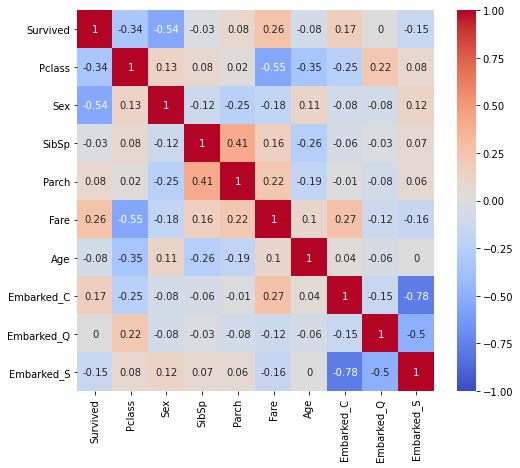

In [5]:
# Visualización coeficientes Pearson
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df_titanic.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 03 Construcción árbol de decisión con scikit learn
Construcción de un árbol de decisión utilizando la librería [scikit learn](https://scikit-learn.org/stable/), la libería básica de referencia para machine learning.

## 0301 Importamos las librerías

In [6]:
# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0302 Inicializamos el árbol
Definiendo las características que tendrá.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [7]:
# Inicializamos un árbol. Por ahora está vacío. 
# Solo definimos cómo queremos que sea en cuanto a su estructura y condiciones de entrenamiento
arbol = tree.DecisionTreeClassifier(max_depth=3)
arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
# Recuerda que si éste fuera un problema de regresión
# inicializaríamos el modelo como:
arbol_2 = tree.DecisionTreeRegressor(max_depth=3)
arbol_2

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## 0303 Entrenamos el modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) realiza el proceso de particionado recursivo que hemos hecho nosotros antes a mano.

In [9]:
df_titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,22.0,0,0,1
1,1,1,0,1,0,71.2833,38.0,1,0,0
2,1,3,0,0,0,7.9250,26.0,0,0,1
3,1,1,0,1,0,53.1000,35.0,0,0,1
4,0,3,1,0,0,8.0500,35.0,0,0,1


In [10]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [11]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
arbol = arbol.fit(X = df_titanic[cols],  # vars descriptivas
                  y = df_titanic['Survived'])                  # var objetico
arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##0304 Visualizamos el modelo
Una vez entrenado el modelo, podemos visualizarlo.

In [12]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbol, 
                                 feature_names=cols)
print(esquema_print)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- class: 1
|   |   |--- Fare >  23.35
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Age <= 13.00
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- class: 0
|   |--- Age >  13.00
|   |   |--- Fare <= 26.27
|   |   |   |--- class: 0
|   |   |--- Fare >  26.27
|   |   |   |--- class: 0



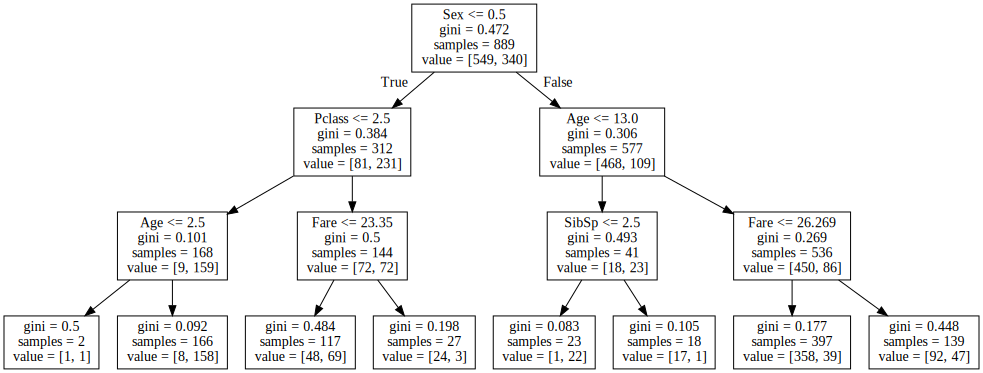

In [13]:
# O con la librería graphviz
import graphviz 

# Export_graphviz
dot_data = tree.export_graphviz(arbol, 
                                out_file=None, 
                                feature_names=cols) 
graph = graphviz.Source(dot_data) 
graph

## 0405 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo. 

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [14]:
# Predicción
prediccion = arbol.predict(df_titanic[cols])

In [15]:
# Cómo de buena es la predicción?
from sklearn.metrics import accuracy_score
accuracy_score(df_titanic['Survived'], prediccion)

0.8335208098987626

# 04 EJERCICIO PREDICCIÓN DIABETES

## 0401 Importa el dataset
Puedes encontrarlo en mi github. Este es el link al archivo raw: https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/diabetesIndia.csv.

Importa los datos en un dataframe llamado **dataframe df**.

In [ ]:
url = ...

df = pd.read_csv(url)

df.head()

## 0402 EDA
Puedes realizar un análisis exploratorio utilizando, por ejemplo: 

*   funciones como dataframe.info()
*   dataframe.describe() para comprobar la distribución de las variables numéricas
*   dataframe.isna().sum() para comprobar si hay nulos
*   visualización de los coeficientes de pearson para ver las correlaciones

 

## 0603 Crea el árbol de decisión
En realidad crea 3 árboles: de 3, 6 y 12 capas de profundidad.

In [ ]:
df.columns

In [ ]:
# Crea una lista con las variables que vamos a utilizar para predecir:
# ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#  'BMI', 'DiabetesPedigreeFunction', 'Age']
lista = [...]

# Define el dataframe X con las variables predictivas
X = df[lista]

# Define el vector y con la variable a predecir
y = df['...']

In [ ]:
# Inicializamos los distintos árboles de decisión definiendo la profundidad
arbol_3 = ...
arbol_6 = ...
arbol_12 = ..

In [ ]:
# Entrena el árbol con los datos del Titanic


## 0604 Visualiza el árbol
Qué variables utiliza el árbol para inferir el riesgo de diabetes? Tiene sentido?

In [ ]:
# con export_test


In [ ]:
# con export_graphviz


## 0605 Realiza una predicción
Realiza una predicción con tus árboles y comprueba cuánto han acertado.

In [ ]:
# Realiza una predicción con cada árbol


In [ ]:
# Comprueba la precisión de cada predicción
